In [ ]:
import numpy as np

In [1]:
import pandas as pd

In [2]:
# pwd: /c/Users/Owner
file_path = "C:/Users/Owner/Project2502/Data.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.columns

Index(['Month', 'FullTime', 'PartTime', 'Intern', 'Contract', 'Terminate',
       'Operational Cost'],
      dtype='object')

In [5]:
df['Headcount'] = df['FullTime']+df['PartTime']+df['Intern']+df['Contract']

In [6]:
# --- Employee Category Proportions ---
df["FullTime_Prop"] = df["FullTime"] / df["Headcount"]
df["PartTime_Prop"] = df["PartTime"] / df["Headcount"]
df["Intern_Prop"] = df["Intern"] / df["Headcount"]
df["Contract_Prop"] = df["Contract"] / df["Headcount"]


In [7]:
df.head()

,Month,FullTime,PartTime,Intern,Contract,Terminate,Operational Cost,Headcount,FullTime_Prop,PartTime_Prop,Intern_Prop,Contract_Prop
0,201901,240422,16413,835.0,38813,2360,"5,367,754,214.01",296483.0,0.810913,0.055359,0.002816,0.130911
1,201902,239957,16601,947.5,39278,2263,"5,453,119,475.99",296783.5,0.808525,0.055936,0.003193,0.132346
2,201903,239491,16789,1060.0,39743,3966,"5,527,625,881.98",297083.0,0.806142,0.056513,0.003568,0.133777
3,201904,240027,16749,1717.0,40032,3873,"5,367,286,525.00",298525.0,0.804043,0.056106,0.005752,0.134099
4,201905,240027,16749,1717.0,40032,4029,"5,427,404,579.99",298525.0,0.804043,0.056106,0.005752,0.134099


In [8]:
# --- Turnover Rate Calculation ---
df["Turnover_Rate"] = df["Terminate"] / df["Headcount"]

In [9]:
df["Month"] = df["Month"].astype(str)

# Modify the encoding function to use string comparisons directly
def encode_pandemic_period(month):
    if "201901" <= month <= "201912":
        return 0  # Pre-pandemic
    elif "202001" <= month <= "202112":
        return 1  # Pandemic
    else:
        return 2  # Post-pandemic

# Apply the encoding function to the 'Month' column
df["Pandemic_Period"] = df["Month"].apply(encode_pandemic_period)

In [10]:
df.head()

,Month,FullTime,PartTime,Intern,Contract,Terminate,Operational Cost,Headcount,FullTime_Prop,PartTime_Prop,Intern_Prop,Contract_Prop,Turnover_Rate,Pandemic_Period
0,201901,240422,16413,835.0,38813,2360,"5,367,754,214.01",296483.0,0.810913,0.055359,0.002816,0.130911,0.007960,0
1,201902,239957,16601,947.5,39278,2263,"5,453,119,475.99",296783.5,0.808525,0.055936,0.003193,0.132346,0.007625,0
2,201903,239491,16789,1060.0,39743,3966,"5,527,625,881.98",297083.0,0.806142,0.056513,0.003568,0.133777,0.013350,0
3,201904,240027,16749,1717.0,40032,3873,"5,367,286,525.00",298525.0,0.804043,0.056106,0.005752,0.134099,0.012974,0
4,201905,240027,16749,1717.0,40032,4029,"5,427,404,579.99",298525.0,0.804043,0.056106,0.005752,0.134099,0.013496,0


In [11]:
df.Pandemic_Period.unique()

array([0, 1, 2], dtype=int64)

In [12]:
# Create dummy columns for Pandemic_Period
df = pd.get_dummies(df, columns=["Pandemic_Period"], drop_first=False)

In [14]:
# Convert the dummy variables to integer if they're not already
df["Pandemic_Period_0"] = df["Pandemic_Period_0"].astype(int)
df["Pandemic_Period_1"] = df["Pandemic_Period_1"].astype(int)
df["Pandemic_Period_2"] = df["Pandemic_Period_2"].astype(int)


In [15]:
df.head()

,Month,FullTime,PartTime,Intern,Contract,Terminate,Operational Cost,Headcount,FullTime_Prop,PartTime_Prop,Intern_Prop,Contract_Prop,Turnover_Rate,Pandemic_Period_0,Pandemic_Period_1,Pandemic_Period_2
0,201901,240422,16413,835.0,38813,2360,"5,367,754,214.01",296483.0,0.810913,0.055359,0.002816,0.130911,0.007960,1,0,0
1,201902,239957,16601,947.5,39278,2263,"5,453,119,475.99",296783.5,0.808525,0.055936,0.003193,0.132346,0.007625,1,0,0
2,201903,239491,16789,1060.0,39743,3966,"5,527,625,881.98",297083.0,0.806142,0.056513,0.003568,0.133777,0.013350,1,0,0
3,201904,240027,16749,1717.0,40032,3873,"5,367,286,525.00",298525.0,0.804043,0.056106,0.005752,0.134099,0.012974,1,0,0
4,201905,240027,16749,1717.0,40032,4029,"5,427,404,579.99",298525.0,0.804043,0.056106,0.005752,0.134099,0.013496,1,0,0


In [16]:
import statsmodels.api as sm

In [44]:
df = pd.read_csv("processed_data.csv")

In [45]:
df["Operational Cost"] = pd.to_numeric(df["Operational Cost"], errors="coerce")

In [46]:
df.dtypes

Month                  int64
FullTime               int64
PartTime               int64
Intern               float64
Contract               int64
Terminate              int64
Operational Cost       int64
Headcount            float64
FullTime_Prop        float64
PartTime_Prop        float64
Intern_Prop          float64
Contract_Prop        float64
Turnover_Rate        float64
Pandemic_Period_0      int64
Pandemic_Period_1      int64
Pandemic_Period_2      int64
dtype: object

In [47]:
# --- Statistical Model Training ---
# Define independent variables (X) and dependent variable (y)
X = df[["Operational Cost", "FullTime_Prop", "PartTime_Prop", "Intern_Prop", "Contract_Prop", "Pandemic_Period_0","Pandemic_Period_1","Pandemic_Period_2"]]
y = df["Turnover_Rate"]

In [48]:
print(y.dtypes)

float64


In [49]:
print(X.dtypes)

Operational Cost       int64
FullTime_Prop        float64
PartTime_Prop        float64
Intern_Prop          float64
Contract_Prop        float64
Pandemic_Period_0      int64
Pandemic_Period_1      int64
Pandemic_Period_2      int64
dtype: object


In [50]:
# Add a constant term to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Turnover_Rate   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     12.98
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           5.77e-09
Time:                        18:51:32   Log-Likelihood:                 294.97
No. Observations:                  60   AIC:                            -575.9
Df Residuals:                      53   BIC:                            -561.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0524      0.02

In [25]:
df.to_csv("processed_data.csv", index=False)

In [27]:
df.head()

,Month,FullTime,PartTime,Intern,Contract,Terminate,Operational Cost,Headcount,FullTime_Prop,PartTime_Prop,Intern_Prop,Contract_Prop,Turnover_Rate,Pandemic_Period_0,Pandemic_Period_1,Pandemic_Period_2
0,201901,240422,16413,835.0,38813,2360,5367754214,296483.0,0.810913,0.055359,0.002816,0.130911,0.007960,1,0,0
1,201902,239957,16601,947.5,39278,2263,5453119476,296783.5,0.808525,0.055936,0.003193,0.132346,0.007625,1,0,0
2,201903,239491,16789,1060.0,39743,3966,5527625882,297083.0,0.806142,0.056513,0.003568,0.133777,0.013350,1,0,0
3,201904,240027,16749,1717.0,40032,3873,5367286525,298525.0,0.804043,0.056106,0.005752,0.134099,0.012974,1,0,0
4,201905,240027,16749,1717.0,40032,4029,5427404580,298525.0,0.804043,0.056106,0.005752,0.134099,0.013496,1,0,0


In [51]:
print(X.isnull().sum())  # Check for NaNs

const                0
Operational Cost     0
FullTime_Prop        0
PartTime_Prop        0
Intern_Prop          0
Contract_Prop        0
Pandemic_Period_0    0
Pandemic_Period_1    0
Pandemic_Period_2    0
dtype: int64


In [ ]:
# df['Pandemic_Period'] = df['Pandemic_Period'].astype('category')

In [ ]:
df['Pandemic_Period'] = df['Pandemic_Period'].cat.codes

In [52]:
df["Operational Cost"] = pd.to_numeric(df["Operational Cost"], errors="coerce")

In [ ]:
df = pd.get_dummies(df, columns=['Pandemic_Period'], drop_first=True)

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
###visualization

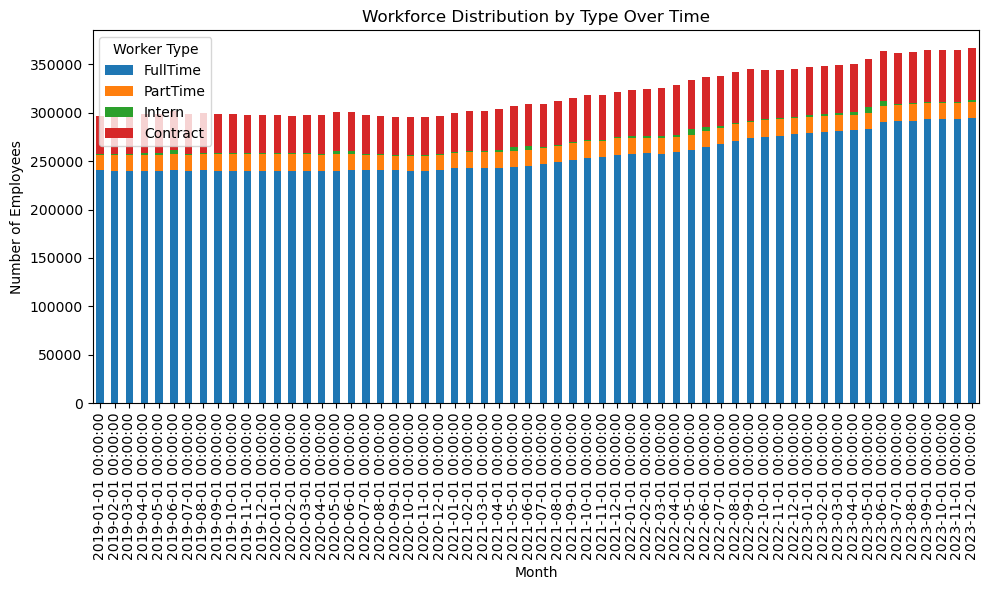

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called df
df = pd.read_csv("processed_data.csv")

df['Month'] = pd.to_datetime(df['Month'].astype(str), format='%Y%m')
# Stacked Bar Plot for Workforce Distribution
df.set_index('Month')[['FullTime', 'PartTime', 'Intern', 'Contract']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Workforce Distribution by Type Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Employees')
plt.legend(title='Worker Type')
plt.tight_layout()
plt.show()

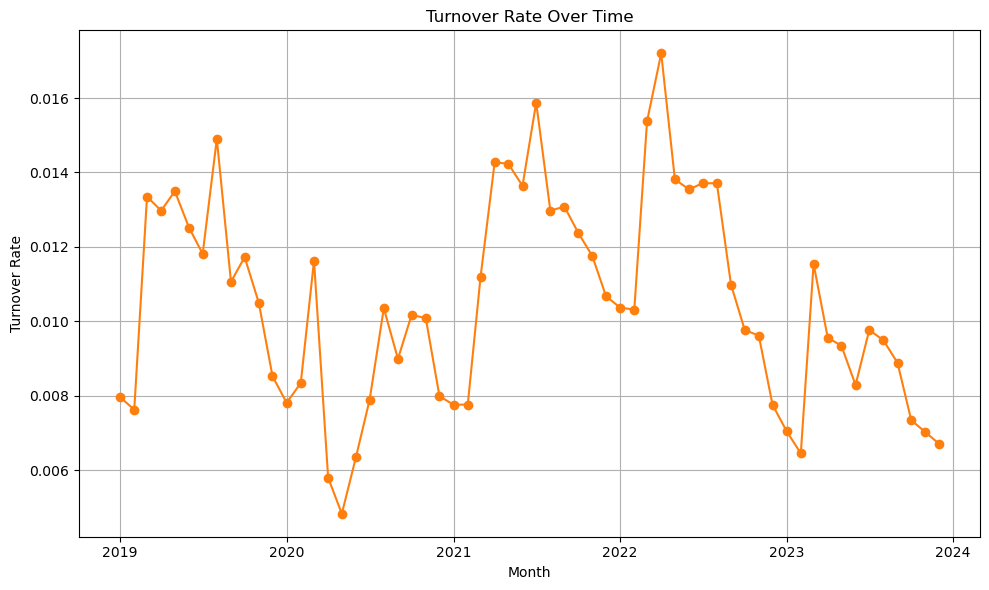

In [57]:
plt.figure(figsize=(10, 6))
# Convert the 'Month' column to datetime
# df['Month'] = pd.to_datetime(df['Month'].astype(str), format='%Y%m')
plt.plot(df['Month'], df['Turnover_Rate'], marker='o', color='tab:orange')
plt.title('Turnover Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Turnover Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

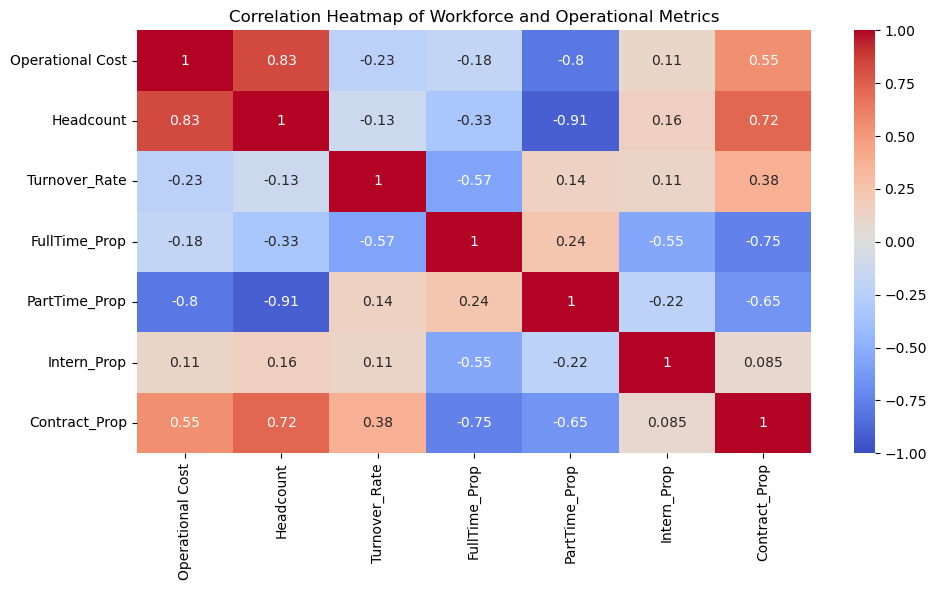

In [41]:
import seaborn as sns

# Selecting relevant columns for the heatmap
correlation_data = df[['Operational Cost', 'Headcount', 'Turnover_Rate', 'FullTime_Prop', 'PartTime_Prop', 'Intern_Prop', 'Contract_Prop']]

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Workforce and Operational Metrics')
plt.tight_layout()
plt.show()